In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\Credit card dataset\Credit_card.csv")
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [23]:
df.shape

(299, 18)

In [24]:
df_label = pd.read_csv(r"C:\Users\Lenovo\Downloads\Credit card dataset\Credit_card_label.csv")
df_label.head()
                       

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [25]:
df_label.shape

(299, 2)

In [26]:
#merging the data

data = df.merge(df_label, how = 'inner', on = 'Ind_ID')
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [27]:
data.shape

(299, 19)

In [28]:
#Preprocessing
data.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           299 non-null    int64  
 1   GENDER           292 non-null    object 
 2   Car_Owner        299 non-null    object 
 3   Propert_Owner    299 non-null    object 
 4   CHILDREN         299 non-null    int64  
 5   Annual_income    288 non-null    float64
 6   Type_Income      299 non-null    object 
 7   EDUCATION        299 non-null    object 
 8   Marital_status   299 non-null    object 
 9   Housing_type     299 non-null    object 
 10  Birthday_count   296 non-null    float64
 11  Employed_days    299 non-null    int64  
 12  Mobile_phone     299 non-null    int64  
 13  Work_Phone       299 non-null    int64  
 14  Phone            299 non-null    int64  
 15  EMAIL_ID         299 non-null    int64  
 16  Type_Occupation  200 non-null    object 
 17  Family_Members  

In [30]:
# checking for duplicate values

data.duplicated().sum()

0

In [31]:
#checking null values
data.isnull().sum()

Ind_ID              0
GENDER              7
Car_Owner           0
Propert_Owner       0
CHILDREN            0
Annual_income      11
Type_Income         0
EDUCATION           0
Marital_status      0
Housing_type        0
Birthday_count      3
Employed_days       0
Mobile_phone        0
Work_Phone          0
Phone               0
EMAIL_ID            0
Type_Occupation    99
Family_Members      0
label               0
dtype: int64

In [32]:
# Creating new column by dividing the birthday_count with 365, by which we get age and employment in years

data['Age'] = np.abs((data['Birthday_count'])/365)

# Convert days to years, set positive values to 0
data['Employment_years'] = np.where(
    data['Employed_days'] > 0,
    0,
    np.abs((data['Employed_days'])/365)  # Convert negative days to positive years
)

In [33]:
data['Type_Occupation'].nunique()

18

In [34]:
data['Type_Occupation'].value_counts()

Type_Occupation
Laborers                 45
Core staff               37
Sales staff              26
Managers                 22
Drivers                  14
Security staff            9
Medicine staff            9
Accountants               8
High skill tech staff     8
Cleaning staff            5
Cooking staff             5
Low-skill Laborers        3
IT staff                  2
Private service staff     2
Secretaries               2
Waiters/barmen staff      1
HR staff                  1
Realty agents             1
Name: count, dtype: int64

In [35]:
data.fillna({
    'GENDER': data['GENDER'].mode()[0],
    'Type_Occupation' : data['Type_Occupation'].mode()[0]
}, inplace=True)


In [36]:
Mean_income_by_income_type = data.groupby(['Type_Income'])['Annual_income'].mean()
Mean_income_by_income_type

Type_Income
Commercial associate    259397.560976
Pensioner               164622.413793
State servant           223500.000000
Working                 189166.153846
Name: Annual_income, dtype: float64

In [37]:
for income_type, mean_inc in Mean_income_by_income_type.items():
    data.loc[(df['Type_Income'] == income_type) & (data['Annual_income'].isna()), 'Annual_income'] = mean_inc

In [38]:
data.isnull().sum()

Ind_ID              0
GENDER              0
Car_Owner           0
Propert_Owner       0
CHILDREN            0
Annual_income       0
Type_Income         0
EDUCATION           0
Marital_status      0
Housing_type        0
Birthday_count      3
Employed_days       0
Mobile_phone        0
Work_Phone          0
Phone               0
EMAIL_ID            0
Type_Occupation     0
Family_Members      0
label               0
Age                 3
Employment_years    0
dtype: int64

In [39]:
data["Age"].isnull().sum()

3

In [40]:
mean_age_by_income_type = data.groupby(['Type_Income'])['Age'].mean()

mean_age_by_income_type

Type_Income
Commercial associate    41.010024
Pensioner               58.596227
State servant           46.583105
Working                 39.984060
Name: Age, dtype: float64

In [41]:
# Impute missing values in 'Age' column with the mean

for income_type, mean_age in mean_age_by_income_type.items():
    data.loc[(data['Type_Income'] == income_type) & (data['Age'].isna()), 'Age'] = mean_age

In [42]:
data["Age"].isnull().sum()

0

In [43]:
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,...,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Age,Employment_years
0,5008827,M,Y,Y,0,180000.000000,Pensioner,Higher education,Married,House / apartment,...,365243,1,0,0,0,Laborers,2,1,51.430137,0.000000
1,5009744,F,Y,N,0,315000.000000,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,Laborers,2,1,37.142466,1.605479
2,5009746,F,Y,N,0,315000.000000,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,Laborers,2,1,41.010024,1.605479
3,5009749,F,Y,N,0,259397.560976,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,Laborers,2,1,37.142466,1.605479
4,5009752,F,Y,N,0,315000.000000,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,Laborers,2,1,37.142466,1.605479


In [44]:
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,...,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Age,Employment_years
0,5008827,M,Y,Y,0,180000.000000,Pensioner,Higher education,Married,House / apartment,...,365243,1,0,0,0,Laborers,2,1,51.430137,0.000000
1,5009744,F,Y,N,0,315000.000000,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,Laborers,2,1,37.142466,1.605479
2,5009746,F,Y,N,0,315000.000000,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,Laborers,2,1,41.010024,1.605479
3,5009749,F,Y,N,0,259397.560976,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,Laborers,2,1,37.142466,1.605479
4,5009752,F,Y,N,0,315000.000000,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,Laborers,2,1,37.142466,1.605479


In [45]:
data.shape

(299, 21)

In [46]:
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,...,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Age,Employment_years
0,5008827,M,Y,Y,0,180000.000000,Pensioner,Higher education,Married,House / apartment,...,365243,1,0,0,0,Laborers,2,1,51.430137,0.000000
1,5009744,F,Y,N,0,315000.000000,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,Laborers,2,1,37.142466,1.605479
2,5009746,F,Y,N,0,315000.000000,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,Laborers,2,1,41.010024,1.605479
3,5009749,F,Y,N,0,259397.560976,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,Laborers,2,1,37.142466,1.605479
4,5009752,F,Y,N,0,315000.000000,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,Laborers,2,1,37.142466,1.605479


In [47]:
data.shape

(299, 21)

In [48]:
#dropping column
data = data.drop(['Ind_ID','Birthday_count', 'Employed_days'], axis=1)
data.shape


(299, 18)

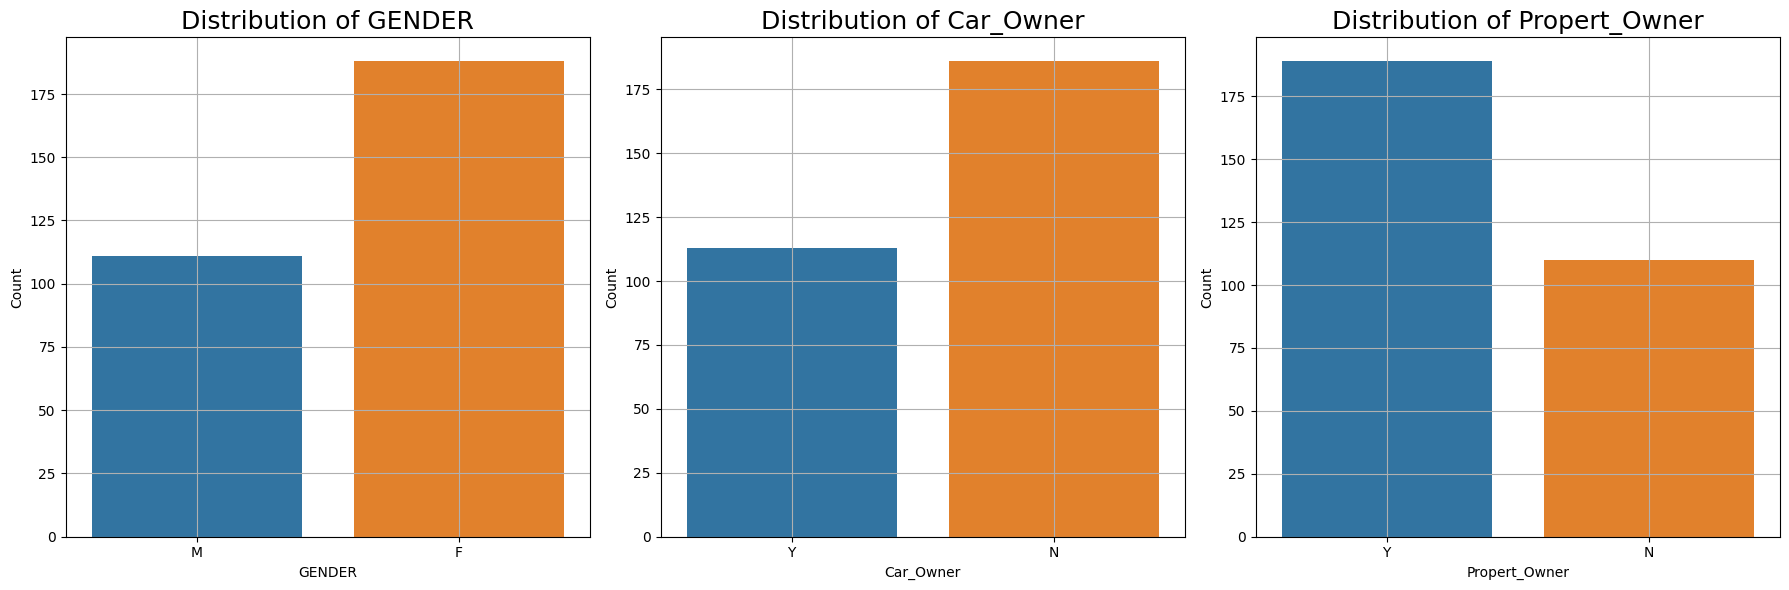

In [49]:
#Handling outlier
#visualizing features

cols = ['GENDER', 'Car_Owner', 'Propert_Owner']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

for i, col in enumerate(cols):
    sns.countplot(data=data , x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}' , fontsize=18 )
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

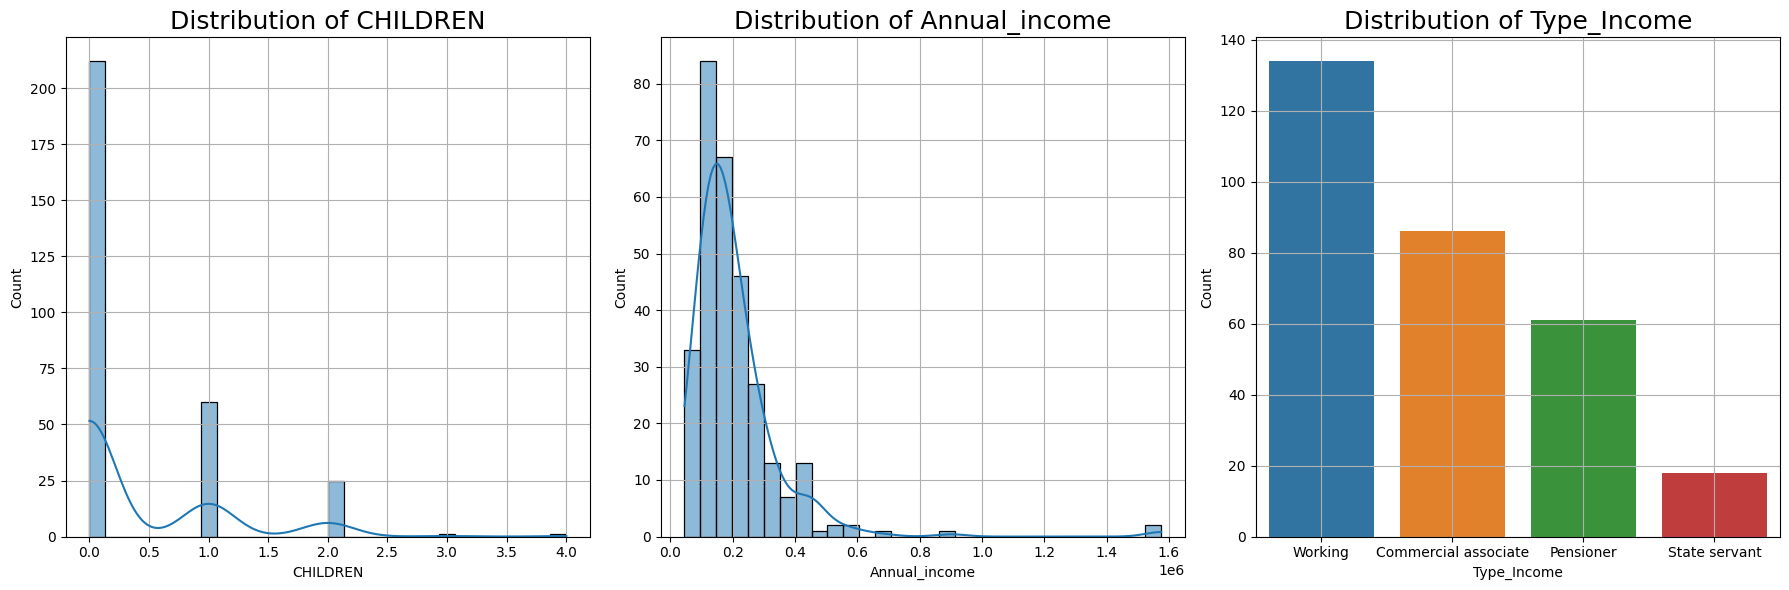

In [50]:
cols = ['CHILDREN', 'Annual_income', 'Type_Income']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot univariate distributions for each column
for i, col in enumerate(cols):
    if data[col].dtype in ['int64', 'float64']:
        sns.histplot(data=data, x=col, ax=axes[i], bins=30, kde=True)
    else:
        sns.countplot(data=data, x=col, ax=axes[i], order=data[col].value_counts().index)

    axes[i].set_title(f'Distribution of {col}', fontsize=18)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')
    axes[i].grid(True)


plt.tight_layout()
plt.show()

<Axes: xlabel='Annual_income'>

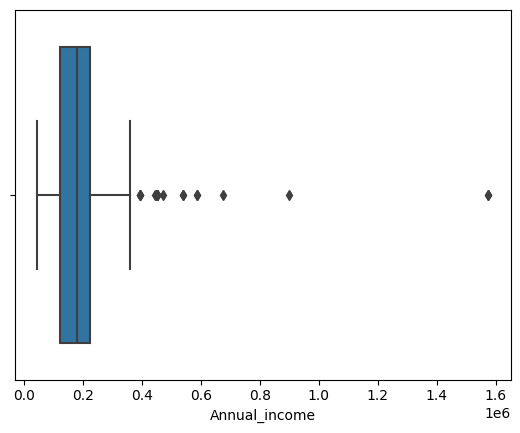

In [51]:
sns.boxplot(data=data, x='Annual_income')

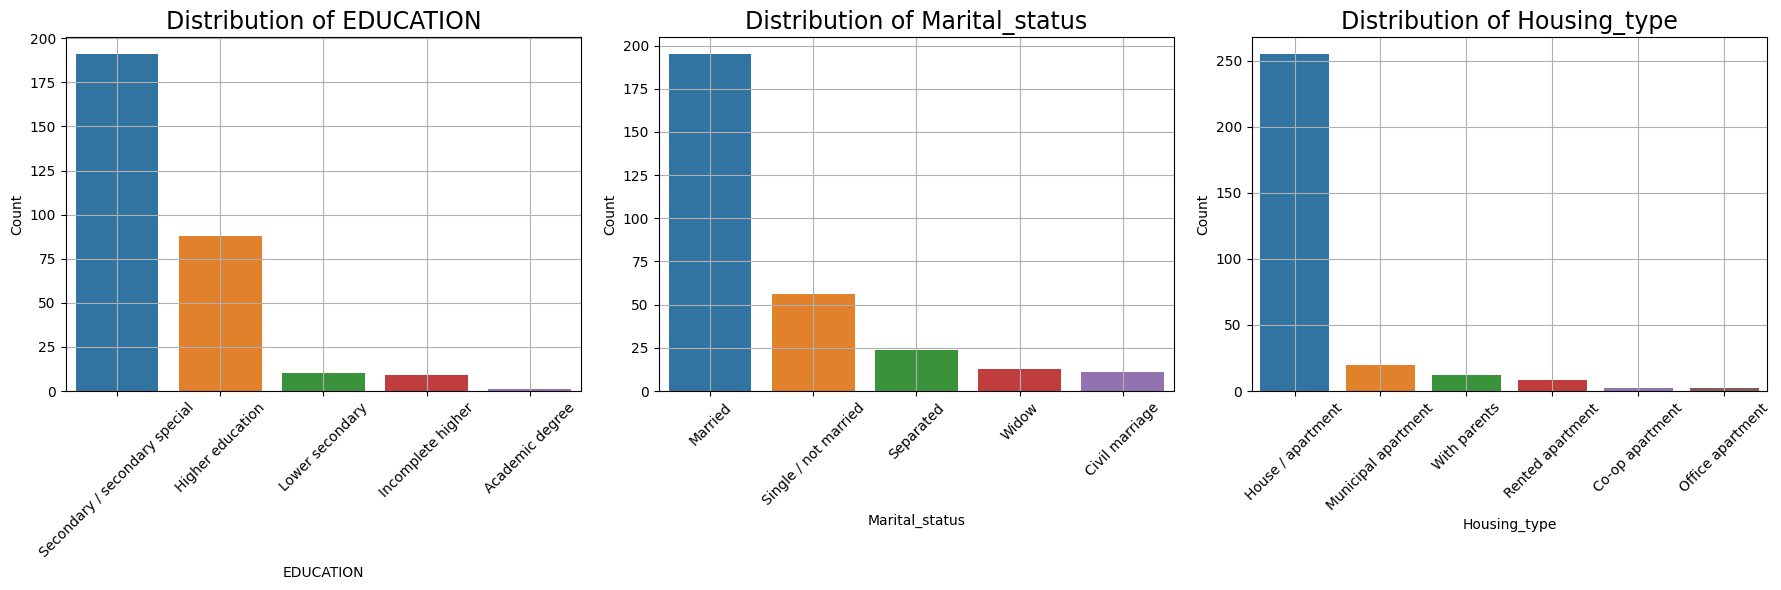

In [52]:
cols = ['EDUCATION', 'Marital_status', 'Housing_type']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

for i, col in enumerate(cols):
    sns.countplot(data=data, x=col, ax=axes[i], order=df[col].value_counts().index)
    axes[i].set_title(f'Distribution of {col}', fontsize = 17)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation = 45)
    axes[i].grid(True)

plt.tight_layout()
plt.show()

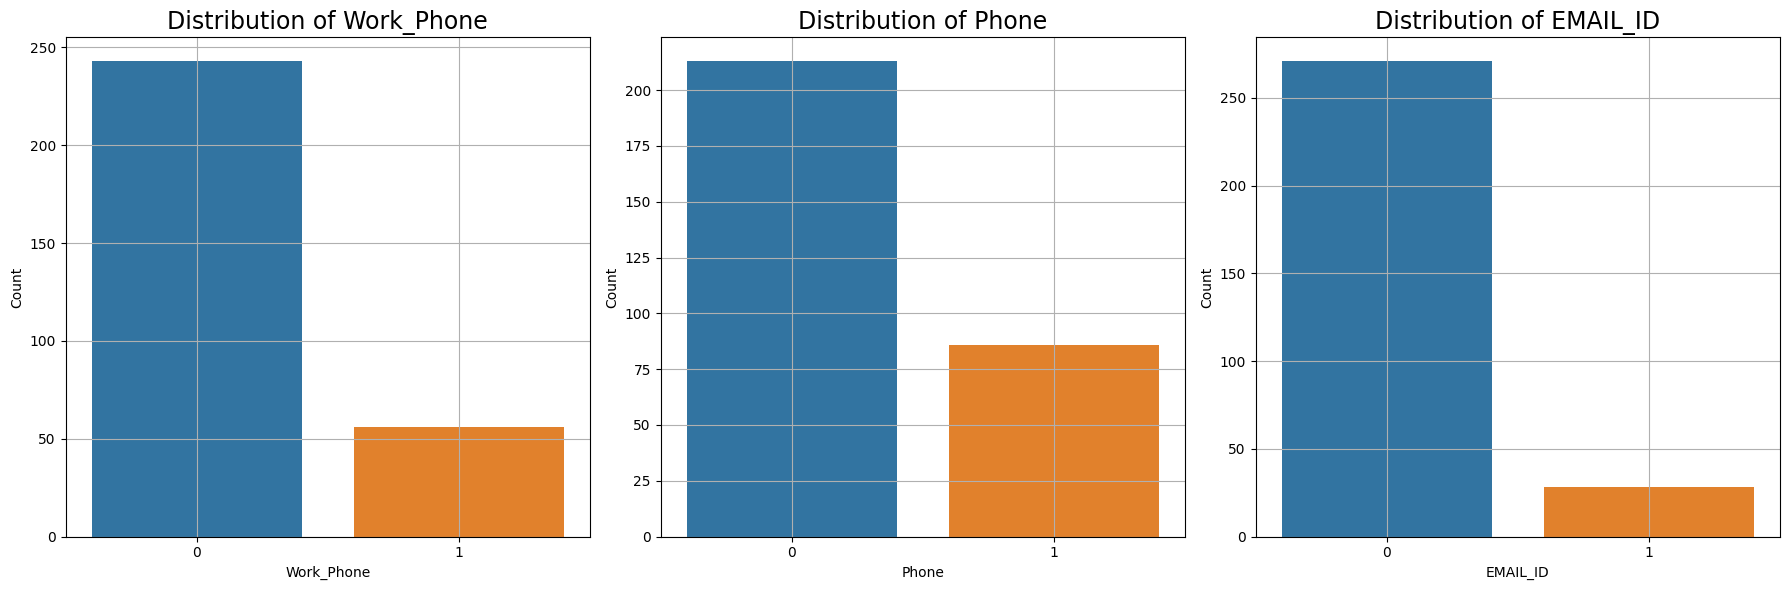

In [53]:
cols = ['Work_Phone', 'Phone', 'EMAIL_ID']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot univariate distributions for each column
for i, col in enumerate(cols):
    sns.countplot(data=data, x=col, ax=axes[i], order=data[col].value_counts().index)
    axes[i].set_title(f'Distribution of {col}', fontsize = 17)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

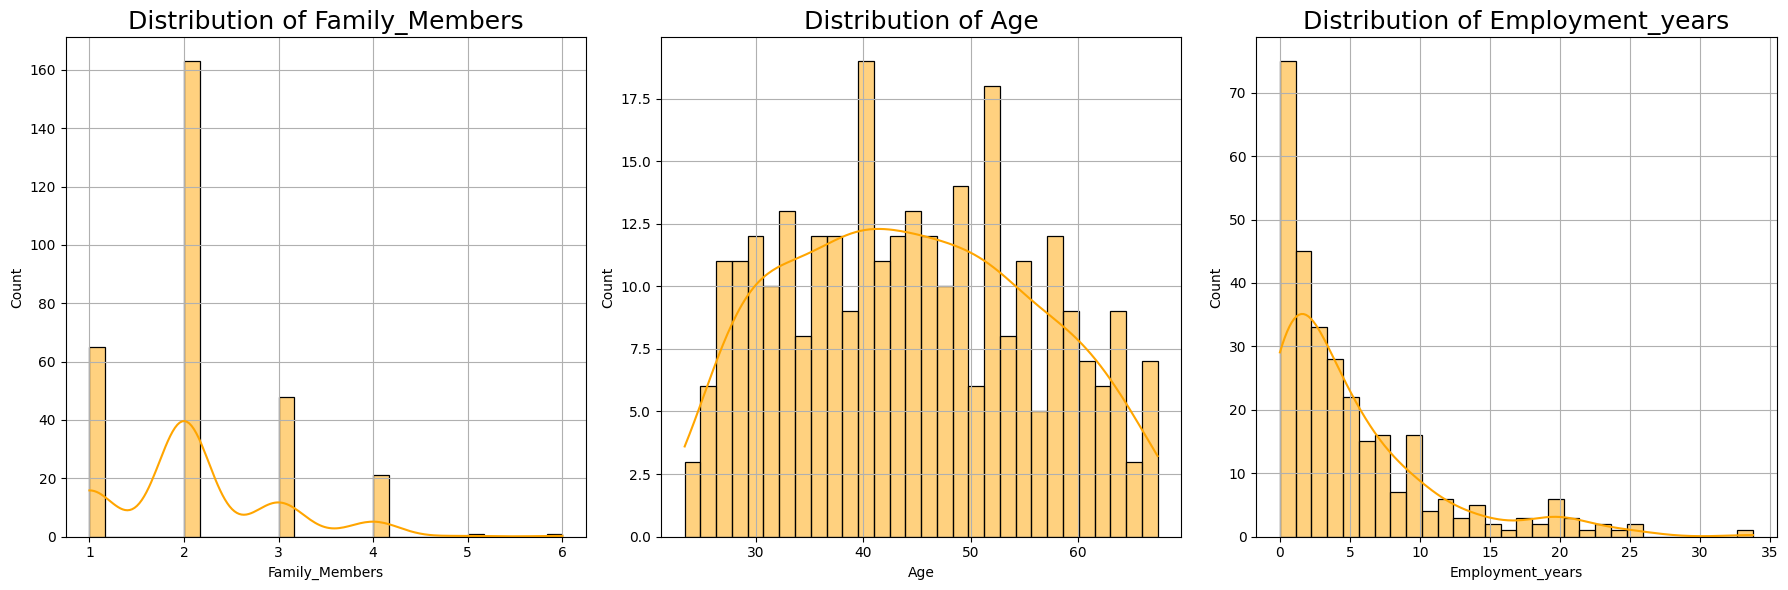

In [54]:
cols = ['Family_Members', 'Age', 'Employment_years']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot univariate distributions for each column
for i, col in enumerate(cols):
    if data[col].dtype in ['int64', 'float64']:
        sns.histplot(data=data, x=col, ax=axes[i], bins=30, kde=True , color ='orange')
    else:
        sns.countplot(data=data, x=col, ax=axes[i], order=df[col].value_counts().index , color ='green')

    axes[i].set_title(f'Distribution of {col}', fontsize = 18)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')
    axes[i].grid(True)

plt.tight_layout()

plt.show()

<Axes: xlabel='Employment_years'>

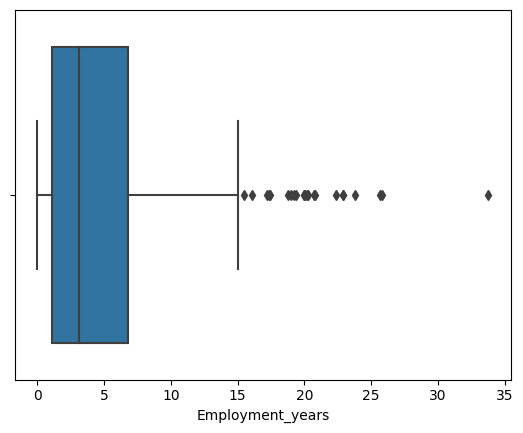

In [55]:
sns.boxplot(data=data,x='Employment_years' )

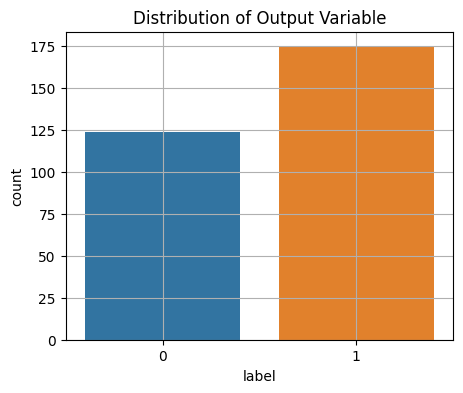

In [56]:
#Target Variable
plt.figure(figsize =(5,4))
sns.countplot(data=data, x='label')
plt.title("Distribution of Output Variable")
plt.grid()
plt.show()

In [57]:
data.columns

Index(['GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Annual_income',
       'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type',
       'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation',
       'Family_Members', 'label', 'Age', 'Employment_years'],
      dtype='object')

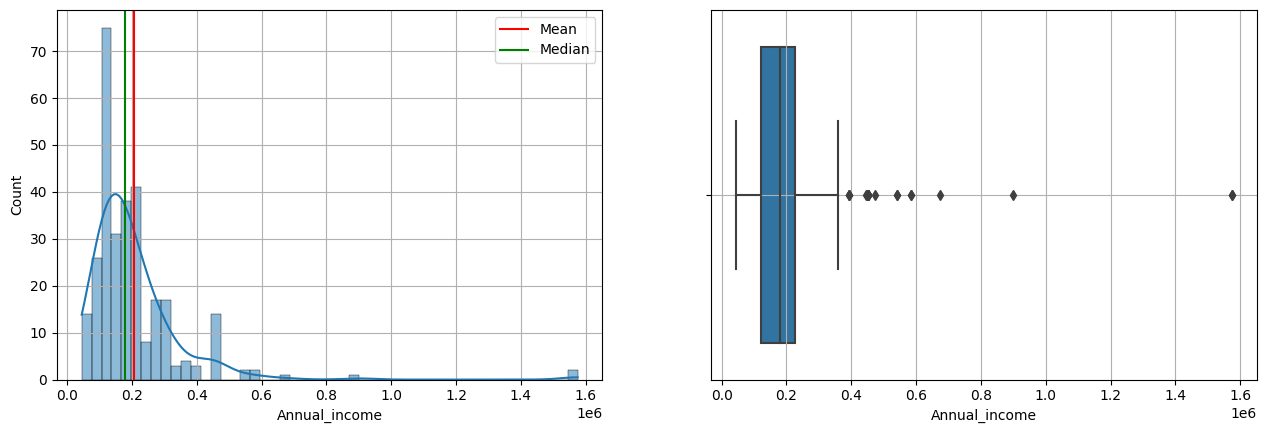

In [58]:
#Treating Outlier

plt.subplot(1,2,1)
sns.histplot(data=data, x='Annual_income',kde=True)
plt.axvline(x=data['Annual_income'].mean(),color="red",label="Mean")
plt.axvline(x=data['Annual_income'].median(),color="green",label="Median")
plt.grid()
plt.legend()

plt.subplot(1,2,2)  # nrows=1, ncols=2
sns.boxplot(data=data, x='Annual_income')

plt.subplots_adjust(right=2.0)
plt.grid()
plt.show()

In [59]:
#IQR method
Q1 = np.percentile(data['Annual_income'],25)
Q3 = np.percentile(data['Annual_income'],75)

IQR=Q3-Q1

In [60]:
# checking value of upper limit

upper_limit = Q3+1.5*IQR

upper_limit

380250.0

In [61]:
# applying upperlimit value

data = data[data['Annual_income'] < upper_limit]

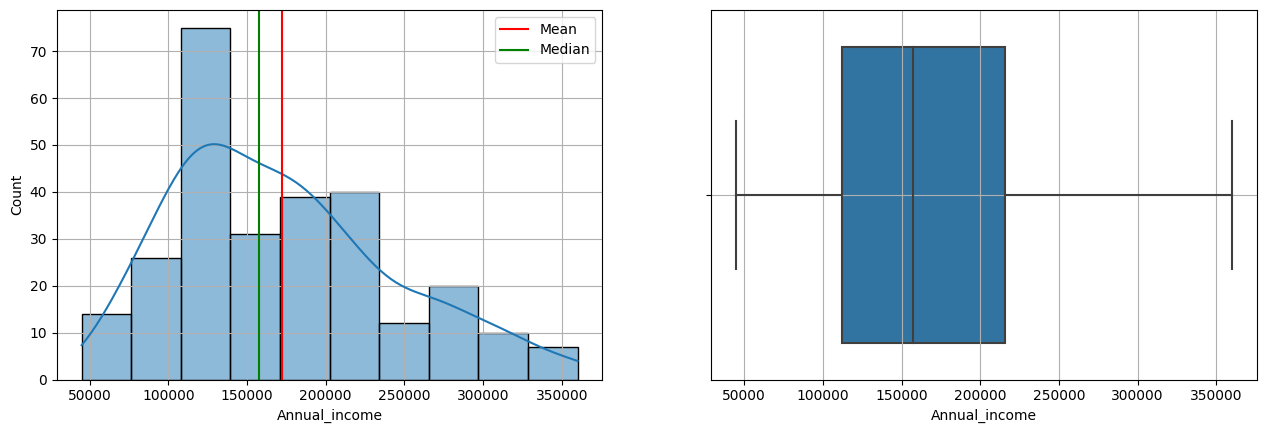

In [62]:
# Verifying by plotting the distribution and box plot after handling outlers

plt.subplot(1,2,1)
sns.histplot(data=data, x='Annual_income',kde=True)
plt.axvline(x=data['Annual_income'].mean(),color="red",label="Mean")
plt.axvline(x=data['Annual_income'].median(),color="green",label="Median")
plt.grid()
plt.legend()

plt.subplot(1,2,2)  # nrows=1, ncols=2
sns.boxplot(data=data, x='Annual_income')

plt.subplots_adjust(right=2.0)
plt.grid()
plt.show()

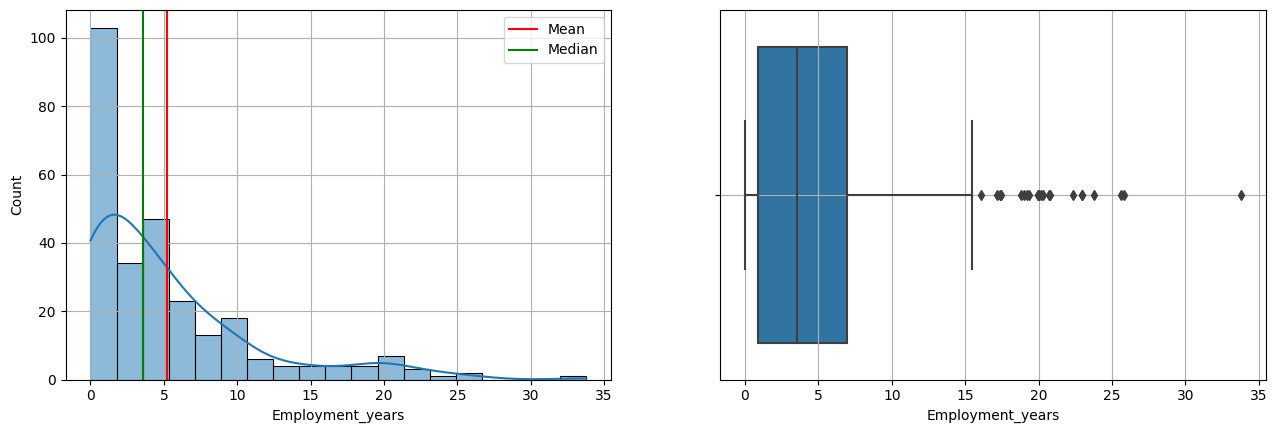

In [63]:
plt.subplot(1,2,1)
sns.histplot(data=data, x='Employment_years',kde=True)
plt.axvline(x=data['Employment_years'].mean(),color="red",label="Mean")
plt.axvline(x=data['Employment_years'].median(),color="green",label="Median")
plt.legend()
plt.grid()

plt.subplot(1,2,2)
sns.boxplot(data=data, x='Employment_years')

plt.subplots_adjust(right=2.0)
plt.grid()
plt.show()


In [64]:
# using IQR method to handle the outliers

Q1 = np.percentile(data['Employment_years'], 25 , method='midpoint')
Q3 = np.percentile(data['Employment_years'], 75 ,method='midpoint')

IQR = Q3-Q1

In [65]:
# checking for upper limit value

upper_limit = Q3+1.5*IQR

upper_limit

15.977397260273975

In [66]:
# applying upperlimit value

data = data[data['Employment_years'] < upper_limit]

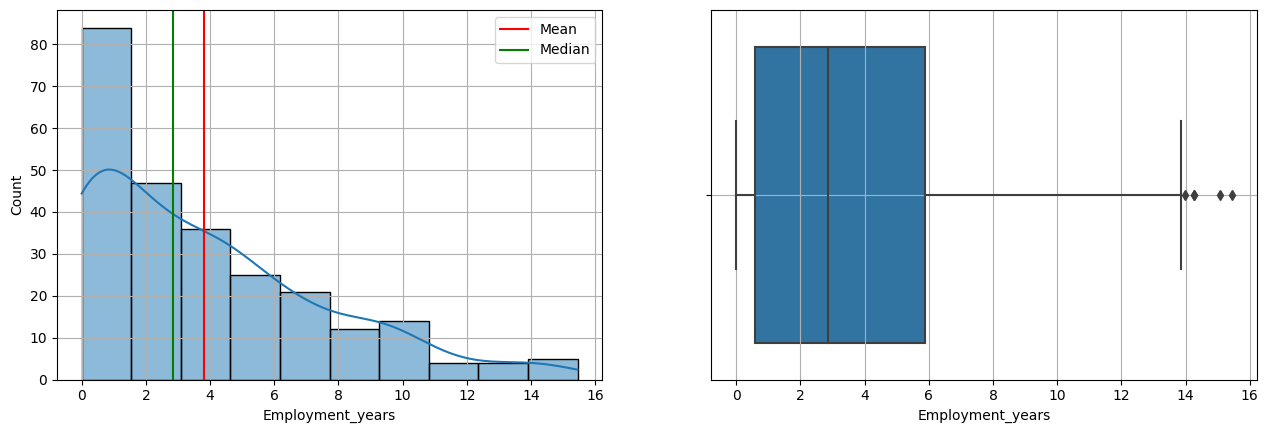

In [67]:
# verifying the distribution and box plot after handling outlers

plt.subplot(1,2,1)
sns.histplot(data=data, x='Employment_years',kde=True)
plt.axvline(x=data['Employment_years'].mean(),color="red",label="Mean")
plt.axvline(x=data['Employment_years'].median(),color="green",label="Median")
plt.legend()
plt.grid()

plt.subplot(1,2,2)
sns.boxplot(data=data, x='Employment_years')

plt.subplots_adjust(right=2.0)
plt.grid()
plt.show()

In [68]:
#Using Square root method to stabilize variance, making the data more normally distributed
data['Employment_years'] = np.sqrt(data['Employment_years'])

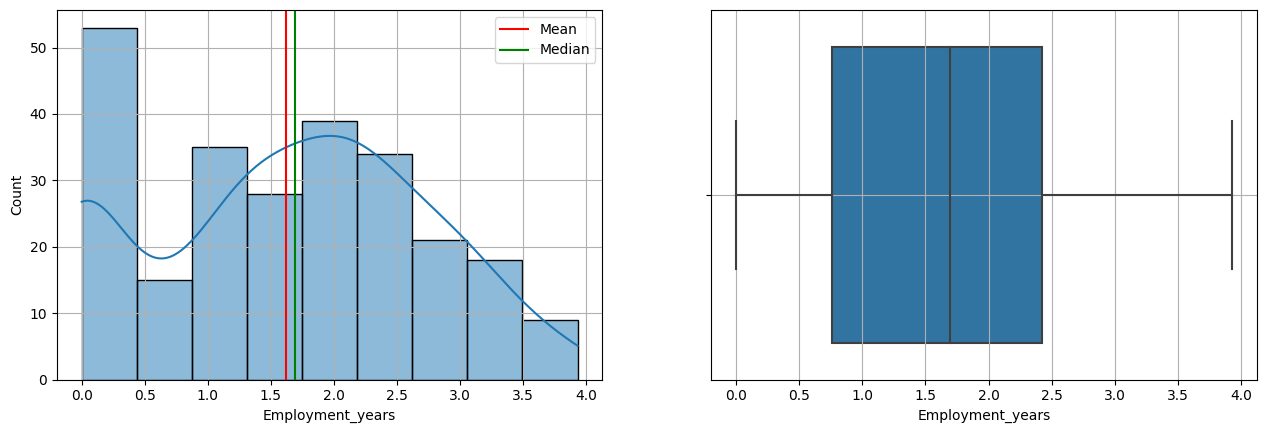

In [69]:
# verifying the distribution and box plot after handling outlers

plt.subplot(1,2,1)
sns.histplot(data=data, x='Employment_years',kde=True)
plt.axvline(x=data['Employment_years'].mean(),color="red",label="Mean")
plt.axvline(x=data['Employment_years'].median(),color="green",label="Median")
plt.legend()
plt.grid()

plt.subplot(1,2,2)
sns.boxplot(data=data, x='Employment_years')

plt.subplots_adjust(right=2.0)
plt.grid()
plt.show()

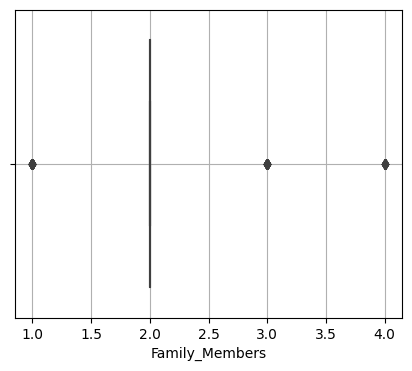

In [70]:
plt.figure(figsize =(5,4))

sns.boxplot(data=data , x='Family_Members')

plt.grid()
plt.show()

In [71]:
data.shape

(252, 18)

In [72]:
data.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Age,Employment_years
0,M,Y,Y,0,180000.000000,Pensioner,Higher education,Married,House / apartment,1,0,0,0,Laborers,2,1,51.430137,0.000000
1,F,Y,N,0,315000.000000,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Laborers,2,1,37.142466,1.267075
2,F,Y,N,0,315000.000000,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Laborers,2,1,41.010024,1.267075
3,F,Y,N,0,259397.560976,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Laborers,2,1,37.142466,1.267075
4,F,Y,N,0,315000.000000,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Laborers,2,1,37.142466,1.267075


In [73]:
# Expoting to CSV file

data.to_csv('cleaned_data.csv')

In [74]:
#Dropping the columns

#Children : Children and family_members are corelated to each other, so dropping.

#Mobile_phone : No variation in data, contains single category value only.
data = data.drop(columns=['CHILDREN','Mobile_phone'])

In [75]:
data.shape

(252, 16)

In [76]:
#Encoding categorical variable
#Binary encoding
# for gender column
data['GENDER'] = data['GENDER'].map({'M':1,'F':0})

# for Car_Owner column
data['Car_Owner'] = data['Car_Owner'].map({'Y':1,'N':0})

# for Property_owner column
data['Propert_Owner'] = data['Propert_Owner'].map({'Y':1,'N':0})

In [77]:
data.head()

,GENDER,Car_Owner,Propert_Owner,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Age,Employment_years
0,1,1,1,180000.000000,Pensioner,Higher education,Married,House / apartment,0,0,0,Laborers,2,1,51.430137,0.000000
1,0,1,0,315000.000000,Commercial associate,Higher education,Married,House / apartment,1,1,0,Laborers,2,1,37.142466,1.267075
2,0,1,0,315000.000000,Commercial associate,Higher education,Married,House / apartment,1,1,0,Laborers,2,1,41.010024,1.267075
3,0,1,0,259397.560976,Commercial associate,Higher education,Married,House / apartment,1,1,0,Laborers,2,1,37.142466,1.267075
4,0,1,0,315000.000000,Commercial associate,Higher education,Married,House / apartment,1,1,0,Laborers,2,1,37.142466,1.267075


In [78]:
#Ordinal encoding for education col
data['EDUCATION'].value_counts()

EDUCATION
Secondary / secondary special    164
Higher education                  68
Lower secondary                   10
Incomplete higher                  9
Academic degree                    1
Name: count, dtype: int64

In [79]:
# importing ordinal encoder
from sklearn.preprocessing import OrdinalEncoder

# values to ordinal
cols_order = ['Lower secondary','Secondary / secondary special','Incomplete higher','Higher education', 'Academic degree']

x = OrdinalEncoder(categories=[cols_order])

data['EDUCATION'] = x.fit_transform(data[['EDUCATION']])

In [80]:
data.head()

,GENDER,Car_Owner,Propert_Owner,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Age,Employment_years
0,1,1,1,180000.000000,Pensioner,3.0,Married,House / apartment,0,0,0,Laborers,2,1,51.430137,0.000000
1,0,1,0,315000.000000,Commercial associate,3.0,Married,House / apartment,1,1,0,Laborers,2,1,37.142466,1.267075
2,0,1,0,315000.000000,Commercial associate,3.0,Married,House / apartment,1,1,0,Laborers,2,1,41.010024,1.267075
3,0,1,0,259397.560976,Commercial associate,3.0,Married,House / apartment,1,1,0,Laborers,2,1,37.142466,1.267075
4,0,1,0,315000.000000,Commercial associate,3.0,Married,House / apartment,1,1,0,Laborers,2,1,37.142466,1.267075


In [81]:
#one-hot encoding

# columns to onehot encoding
one_cols = data[['Type_Income','Marital_status','Housing_type','Type_Occupation']]

data = pd.get_dummies(data, columns=['Type_Income','Marital_status','Housing_type','Type_Occupation'],drop_first=True)  # drop_first to avoid multicolinearity

In [82]:
data.head()

,GENDER,Car_Owner,Propert_Owner,Annual_income,EDUCATION,Work_Phone,Phone,EMAIL_ID,Family_Members,label,...,Type_Occupation_Laborers,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
0,1,1,1,180000.000000,3.0,0,0,0,2,1,...,True,False,False,False,False,False,False,False,False,False
1,0,1,0,315000.000000,3.0,1,1,0,2,1,...,True,False,False,False,False,False,False,False,False,False
2,0,1,0,315000.000000,3.0,1,1,0,2,1,...,True,False,False,False,False,False,False,False,False,False
3,0,1,0,259397.560976,3.0,1,1,0,2,1,...,True,False,False,False,False,False,False,False,False,False
4,0,1,0,315000.000000,3.0,1,1,0,2,1,...,True,False,False,False,False,False,False,False,False,False


In [83]:
data.shape

(252, 41)

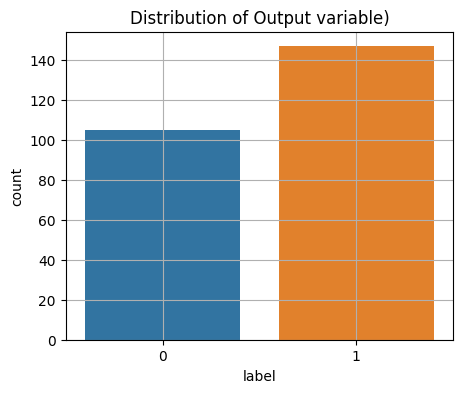

In [84]:
#handling imbalance data
plt.figure(figsize = (5,4))
sns.countplot( data= data, x ='label')
plt.title("Distribution of Output variable)")

plt.grid()
plt.show()

In [85]:
#No imbalance in dataset
data['label'].value_counts()


label
1    147
0    105
Name: count, dtype: int64

In [86]:
X = data.drop(columns=['label'])
y = data['label']

In [87]:
#Splitting data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=10)

In [88]:
X_train.shape

(189, 40)

In [89]:
X_test.shape

(63, 40)

In [90]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [91]:
#Model training
# Required imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score ,roc_auc_score

# Initialize the classifiers
log_reg = LogisticRegression(max_iter=1000, random_state=10)
rfc = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=10, use_label_encoder=False, eval_metric='logloss')

In [92]:
# Dictionary to store results
results = {}

# List of classifiers
classifiers = [('Logistic Regression', log_reg),
               ('Random Forest', rfc),
               ('XGBoost', xgb)]

# Train, predict, and store results
for name, clf in classifiers:
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc_test = roc_auc_score(y_test, y_pred)

    results[name] = [accuracy, precision, recall, f1 , roc_auc_test]

C:\Users\Lenovo\anaconda3\envs\Python_envrnmt\lib\site-packages\xgboost\core.py:158: UserWarning: [15:18:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [93]:
# Convert the results dictionary to a DataFrame for better visualization

results_data = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC Score']).T
results_data

,Accuracy,Precision,Recall,F1-Score,ROC AUC Score
Logistic Regression,0.492063,0.510638,0.727273,0.600000,0.480303
Random Forest,0.603175,0.600000,0.727273,0.657534,0.596970
XGBoost,0.523810,0.536585,0.666667,0.594595,0.516667


In [94]:
#HyperParameter tuning

from sklearn.model_selection import GridSearchCV

In [95]:
# the parameter grid for XGBoost

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6],
    'n_estimators': [50, 100, 150, 200],
    'subsample': [0.8, 0.9, 1],
    'colsample_bytree': [0.8, 0.9, 1]
}

# initialize GridSearchCV
clf_xgb = XGBClassifier(random_state=10, use_label_encoder=False, eval_metric='logloss')

grid_search = GridSearchCV(clf_xgb, param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

print(grid_search.best_params_)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


C:\Users\Lenovo\anaconda3\envs\Python_envrnmt\lib\site-packages\xgboost\core.py:158: UserWarning: [15:19:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


{'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}


In [96]:
# Initialize the XGBoost classifier with the best parameters

xgb_best = XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.05,
    max_depth=3,
    n_estimators=200,
    subsample=1,
    random_state=10,
    use_label_encoder=False,
    eval_metric='logloss'
)
# Train the model
xgb_best.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_best = xgb_best.predict(X_test_scaled)

# Calculate and print the metrics
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_best)

print(f"Accuracy after Hyperparameter Tuning: {accuracy_best}")
print(f"Precision after Hyperparameter Tuning: {precision_best}")
print(f"Recall after Hyperparameter Tuning: {recall_best}")
print(f"F1-Score after Hyperparameter Tuning: {f1_best}")
print(f"ROC AUC Score after Hyperparameter Tuning: {roc_auc_best}")

Accuracy after Hyperparameter Tuning: 0.5555555555555556
Precision after Hyperparameter Tuning: 0.5510204081632653
Recall after Hyperparameter Tuning: 0.8181818181818182
F1-Score after Hyperparameter Tuning: 0.6585365853658537
ROC AUC Score after Hyperparameter Tuning: 0.5424242424242425


In [97]:
# the parameter grid for logistic regression

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # Only these solvers support L1
}
model = LogisticRegression(max_iter=10000)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
print(f"Best parameters: {grid_search.best_params_}")


Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}


In [98]:
logistic_best = LogisticRegression(
                C = 0.1,
                penalty = 'l2',
                solver = 'saga')

#train model
logistic_best.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_best = logistic_best.predict(X_test_scaled)

# Calculate and print the metrics
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_best)

print(f"Accuracy after Hyperparameter Tuning: {accuracy_best}")
print(f"Precision after Hyperparameter Tuning: {precision_best}")
print(f"Recall after Hyperparameter Tuning: {recall_best}")
print(f"F1-Score after Hyperparameter Tuning: {f1_best}")
print(f"ROC AUC Score after Hyperparameter Tuning: {roc_auc_best}")

Accuracy after Hyperparameter Tuning: 0.5396825396825397
Precision after Hyperparameter Tuning: 0.5333333333333333
Recall after Hyperparameter Tuning: 0.9696969696969697
F1-Score after Hyperparameter Tuning: 0.6881720430107527
ROC AUC Score after Hyperparameter Tuning: 0.5181818181818182


In [99]:
#param grid for random forest

param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20,30,40,50, None],
    'min_samples_split': [2, 5, 7],
    'min_samples_leaf': [1, 2, 3]
}

rf = RandomForestClassifier(random_state=10)
grid_search = GridSearchCV(rf, param_grid,scoring = 'accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


In [100]:
# Initialize the Random forest classifier with the best parameters

rf_best = RandomForestClassifier(
    max_depth = 40,
    min_samples_leaf = 1,
    n_estimators = 200,
    min_samples_split = 2
)
# Train the model
rf_best.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_best = rf_best.predict(X_test_scaled)

# Calculate and print the metrics
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_best)

print(f"Accuracy after Hyperparameter Tuning: {accuracy_best}")
print(f"Precision after Hyperparameter Tuning: {precision_best}")
print(f"Recall after Hyperparameter Tuning: {recall_best}")
print(f"F1-Score after Hyperparameter Tuning: {f1_best}")
print(f"ROC AUC Score after Hyperparameter Tuning: {roc_auc_best}")

Accuracy after Hyperparameter Tuning: 0.6190476190476191
Precision after Hyperparameter Tuning: 0.6046511627906976
Recall after Hyperparameter Tuning: 0.7878787878787878
F1-Score after Hyperparameter Tuning: 0.6842105263157895
ROC AUC Score after Hyperparameter Tuning: 0.6106060606060606


In [101]:
import pandas as pd

# Data in metric-as-rows format
data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'],
    'XGBoost': [0.5556, 0.5510, 0.8182, 0.6585, 0.5424],
    'Logistic Regression': [0.5397, 0.5333, 0.9697, 0.6882, 0.5182],
    'Random Forest': [0.5873, 0.5814, 0.7576, 0.6579, 0.5788]
}

# Create DataFrame
df = pd.DataFrame(data)

# Set 'Metric' as index and transpose
df = df.set_index('Metric').T

#Rename columns for clarity
df.columns = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC Score']

print(df)


                     Accuracy  Precision  Recall  F1-Score  ROC AUC Score
XGBoost                0.5556     0.5510  0.8182    0.6585         0.5424
Logistic Regression    0.5397     0.5333  0.9697    0.6882         0.5182
Random Forest          0.5873     0.5814  0.7576    0.6579         0.5788


In [102]:
import pandas as pd

# Before tuning
before = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC Score'],
    'Logistic Regression': [0.492063, 0.510638, 0.727273, 0.600000, 0.480303],
    'Random Forest': [0.603175, 0.600000, 0.727273, 0.657534, 0.596970],
    'XGBoost': [0.523810, 0.536585, 0.666667, 0.594595, 0.516667]
}

# After tuning
after = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC Score'],
    'Logistic Regression': [0.5397, 0.5333, 0.9697, 0.6882, 0.5182],
    'Random Forest': [0.5873, 0.5814, 0.7576, 0.6579, 0.5788],
    'XGBoost': [0.5556, 0.5510, 0.8182, 0.6585, 0.5424]
}

# Convert to DataFrames and set 'Metric' as index
df_before = pd.DataFrame(before).set_index('Metric')
df_after = pd.DataFrame(after).set_index('Metric')

print(f"Before:{df_before}")

print(f"After:{df_after}")


Before:               Logistic Regression  Random Forest   XGBoost
Metric                                                     
Accuracy                  0.492063       0.603175  0.523810
Precision                 0.510638       0.600000  0.536585
Recall                    0.727273       0.727273  0.666667
F1-Score                  0.600000       0.657534  0.594595
ROC AUC Score             0.480303       0.596970  0.516667
After:               Logistic Regression  Random Forest  XGBoost
Metric                                                    
Accuracy                    0.5397         0.5873   0.5556
Precision                   0.5333         0.5814   0.5510
Recall                      0.9697         0.7576   0.8182
F1-Score                    0.6882         0.6579   0.6585
ROC AUC Score               0.5182         0.5788   0.5424


Logistic Regression:

* All metrics improved after tuning, especially recall (from 0.73 to 0.97) and F1-score (from 0.60 to 0.69).


Random Forest:

* Recall and F1-score improved slightly, but accuracy and ROC AUC decreased marginally.

* Precision dropped a bit, suggesting a trade-off between recall and precision after tuning.

XGBoost:

* All metrics improved after tuning, with the most notable gains in recall (from 0.67 to 0.82) and F1-score (from 0.59 to 0.66).


Random Forest achieved the best overall performance after tuning because of its ensemble bagging approach, which constructs multiple decision trees in parallel using random subsets of the data and features. This method reduces variance and helps prevent overfitting, resulting in consistently high accuracy and robust generalization across different metrics

In [103]:
data.shape

AttributeError: 'dict' object has no attribute 'shape'

#Feature Selection Impact
For dataset of 300 samples, I used a filter method based on correlation analysis to select the 10 most relevant features for credit card approval prediction. This approach is best for small datasets

In [ ]:
#selecting top 10 features

corr_matrix = data.corr(method='pearson')  # or 'spearman', 'kendall'
target_corr = corr_matrix['label'].abs().sort_values(ascending=False)

# Exclude the target itself and select the top 10 features
top_features = target_corr.index[1:11]
print("Top 10 features based on correlation with target:", list(top_features))

# Subset your data
X_selected = data[top_features]


# Retrain model on reduced feature set

In [ ]:
#Splitting data into training and testing
from sklearn.model_selection import train_test_split

X_train_2, X_test_2, y_train_2, y_test_2=train_test_split(X_selected, y, test_size=0.25, random_state=10)

In [ ]:
X_train_2.shape

In [ ]:
X_test_2.shape

In [ ]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler

scaler_2 = MinMaxScaler()

X_train_scaled_2 = scaler_2.fit_transform(X_train_2)

X_test_scaled_2 = scaler_2.transform(X_test_2)

In [ ]:
#Model training
# Required imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score ,roc_auc_score

# Initialize the classifiers
log_reg = LogisticRegression(max_iter=1000, random_state=10)
rfc = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=10, use_label_encoder=False, eval_metric='logloss')

In [ ]:
# Dictionary to store results
results_2 = {}

# List of classifiers
classifiers_2 = [('Logistic Regression', log_reg),
               ('Random Forest', rfc),
               ('XGBoost', xgb)]

# Train, predict, and store results
for name_2, clf_2 in classifiers_2:
    clf_2.fit(X_train_scaled_2, y_train_2)
    y_pred_2 = clf_2.predict(X_test_scaled_2)

    accuracy_2 = accuracy_score(y_test_2, y_pred_2)
    precision_2 = precision_score(y_test_2, y_pred_2)
    recall_2 = recall_score(y_test_2, y_pred_2)
    f1_2 = f1_score(y_test_2, y_pred_2)
    roc_auc_test_2 = roc_auc_score(y_test_2, y_pred_2)

    results_2[name_2] = [accuracy_2, precision_2, recall_2, f1_2 , roc_auc_test_2]

In [ ]:
# Convert the results dictionary to a DataFrame for better visualization

results_data_2 = pd.DataFrame(results_2, index=['Accuracy_2', 'Precision_2', 'Recall_2', 'F1-Score_2', 'ROC AUC Score_2']).T
results_data_2

In [ ]:
# the parameter grid for XGBoost

param_grid_2 = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6],
    'n_estimators': [50, 100, 150, 200],
    'subsample': [0.8, 0.9, 1],
    'colsample_bytree': [0.8, 0.9, 1]
}

# initialize GridSearchCV
clf_xgb_2 = XGBClassifier(random_state=10, use_label_encoder=False, eval_metric='logloss')

grid_search_2 = GridSearchCV(clf_xgb_2, param_grid_2, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# fit GridSearchCV
grid_search_2.fit(X_train_scaled_2, y_train_2)

print(grid_search_2.best_params_)

In [ ]:
# Initialize the XGBoost classifier with the best parameters

xgb_best_2 = XGBClassifier(
    colsample_bytree=0.9,
    learning_rate=0.01,
    max_depth=4,
    n_estimators=100,
    subsample=0.9,
    random_state=10,
    use_label_encoder=False,
    eval_metric='logloss'
)
# Train the model
xgb_best_2.fit(X_train_scaled_2, y_train_2)

# Predict on the test set
y_pred_best_2 = xgb_best_2.predict(X_test_scaled_2)

# Calculate and print the metrics
accuracy_best_2 = accuracy_score(y_test_2, y_pred_best_2)
precision_best_2 = precision_score(y_test_2, y_pred_best_2)
recall_best_2 = recall_score(y_test_2, y_pred_best_2)
f1_best_2 = f1_score(y_test_2, y_pred_best_2)
roc_auc_best_2 = roc_auc_score(y_test_2, y_pred_best_2)

print(f"Accuracy after Hyperparameter Tuning: {accuracy_best_2}")
print(f"Precision after Hyperparameter Tuning: {precision_best_2}")
print(f"Recall after Hyperparameter Tuning: {recall_best_2}")
print(f"F1-Score after Hyperparameter Tuning: {f1_best_2}")
print(f"ROC AUC Score after Hyperparameter Tuning: {roc_auc_best_2}")

In [ ]:
# the parameter grid for logistic regression

param_grid_2 = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # Only these solvers support L1
}
model_2 = LogisticRegression(max_iter=10000)
grid_search_2 = GridSearchCV(model_2, param_grid_2, cv=5, scoring='accuracy')
grid_search_2.fit(X_train_scaled_2, y_train_2)
print(f"Best parameters: {grid_search_2.best_params_}")


In [ ]:
logistic_best_2 = LogisticRegression(
                C = 0.1,
                penalty = 'l2',
                solver = 'liblinear')

#train model
logistic_best_2.fit(X_train_scaled_2, y_train_2)

# Predict on the test set
y_pred_best_2 = logistic_best_2.predict(X_test_scaled_2)

# Calculate and print the metrics
accuracy_best_2 = accuracy_score(y_test_2, y_pred_best_2)
precision_best_2 = precision_score(y_test_2, y_pred_best_2)
recall_best_2 = recall_score(y_test_2, y_pred_best_2)
f1_best_2 = f1_score(y_test_2, y_pred_best_2)
roc_auc_best_2 = roc_auc_score(y_test_2, y_pred_best_2)

print(f"Accuracy after Hyperparameter Tuning: {accuracy_best_2}")
print(f"Precision after Hyperparameter Tuning: {precision_best_2}")
print(f"Recall after Hyperparameter Tuning: {recall_best_2}")
print(f"F1-Score after Hyperparameter Tuning: {f1_best_2}")
print(f"ROC AUC Score after Hyperparameter Tuning: {roc_auc_best_2}")

In [ ]:
#param grid for random forest

param_grid_2 = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20,30,40,50, None],
    'min_samples_split': [2, 5, 7],
    'min_samples_leaf': [1, 2, 3]
}

rf_2 = RandomForestClassifier(random_state=10)
grid_search_2 = GridSearchCV(rf_2, param_grid_2,scoring = 'accuracy', cv=5, n_jobs=-1)
grid_search_2.fit(X_train_scaled_2, y_train_2)
print(f"Best parameters: {grid_search_2.best_params_}")

In [ ]:
# Initialize the Random forest classifier with the best parameters

rf_best_2 = RandomForestClassifier(
    max_depth = 10,
    min_samples_leaf = 1,
    n_estimators = 100,
    min_samples_split = 2
)
# Train the model
rf_best_2.fit(X_train_scaled_2, y_train_2)

# Predict on the test set
y_pred_best_2 = rf_best_2.predict(X_test_scaled_2)

# Calculate and print the metrics
accuracy_best_2 = accuracy_score(y_test_2, y_pred_best_2)
precision_best_2 = precision_score(y_test_2, y_pred_best_2)
recall_best_2 = recall_score(y_test_2, y_pred_best_2)
f1_best_2 = f1_score(y_test_2, y_pred_best_2)
roc_auc_best_2 = roc_auc_score(y_test_2, y_pred_best_2)

print(f"Accuracy after Hyperparameter Tuning: {accuracy_best_2}")
print(f"Precision after Hyperparameter Tuning: {precision_best_2}")
print(f"Recall after Hyperparameter Tuning: {recall_best_2}")
print(f"F1-Score after Hyperparameter Tuning: {f1_best_2}")
print(f"ROC AUC Score after Hyperparameter Tuning: {roc_auc_best_2}")

In [ ]:

import pandas as pd

# Define the data
metric_2 = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'],
    'XGBoost': [0.5238, 0.5273, 0.8788, 0.6591, 0.5060],
    'Logistic Regression': [0.5238, 0.5246, 0.9697, 0.6809, 0.5015],
    'Random Forest': [0.5873, 0.5778, 0.7879, 0.6667, 0.5773]
}

# Create the DataFrame and round for readability
df_2 = pd.DataFrame(metric_2).round(4)

# Set 'Metric' as index and transpose
df_2_transposed = df_2.set_index('Metric').T

# Optional: Rename columns for clarity
df_2_transposed.columns = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC Score']

print(df_2_transposed)


# Part1 Result

In [ ]:

# Define the data
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'],
    'XGBoost': [0.5556, 0.5510, 0.8182, 0.6585, 0.5424],
    'Logistic Regression': [0.5397, 0.5333, 0.9697, 0.6882, 0.5182],
    'Random Forest': [0.5873, 0.5814, 0.7576, 0.6579, 0.5788]
}

# Create the DataFrame
df = pd.DataFrame(metrics)

df


Summary :

XGBoost:

-> Accuracy and precision decreased in part 2, but recall increased.

->F1-score and ROC AUC remained similar or slightly decreased.

Logistic Regression:

-> Accuracy, precision, F1-score, and ROC AUC slightly decreased in part 2 but recall unchanged.

Random Forest:

->Metrics are very stable across both sets, with only minor changes.

# How feature reduction impacted performance?

* Logistic Regression, being a simpler model, may have suffered from information loss due to aggressive feature reduction.

* For XGBoost, feature reduction may have removed some informative variables, causing a slight drop in overall prediction, but the model became more sensitive (higher recall), possibly at the cost of more false positives.

* Random Forest appears robust to feature reduction in this case, likely because it can effectively utilize the most informative features and ignore the rest.




# Optimal feature count for each model

In [ ]:
#Logistic Regression
#using L1 regularization path

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score

model = LogisticRegression(penalty='l1', solver='liblinear')
selector = SelectFromModel(model)
selector.fit(X, y)
selected_features = X.columns[selector.get_support()]
selected_features.value_counts().sum()


Optimal feature count for Logistic regression is 16.


In [ ]:
#Random forest
#Using RFE (Recursive feature elimination)

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

rf = RandomForestClassifier(random_state=42)
feature_range = range(2, X.shape[1] + 1)  # Try from 2 up to all features
scores = []

for n_features in feature_range:
    rfe = RFE(rf, n_features_to_select=n_features)
    X_rfe = rfe.fit_transform(X, y)
    score = cross_val_score(rf, X_rfe, y, cv=5, scoring='accuracy').mean()
    scores.append(score)

# Find the optimal number of features
optimal_n = feature_range[np.argmax(scores)]
optimal_score = max(scores)

print(f"Optimal number of features: {optimal_n}")
print(f"Best cross-validated accuracy: {optimal_score:.4f}")

plt.plot(feature_range, scores, marker='o')
plt.xlabel('Number of Selected Features')
plt.ylabel('Cross-Validated Accuracy')
plt.title('RFE with Random Forest: Feature Selection')
plt.grid(True)
plt.show()


Optimal number of features for random forest is 14.

In [ ]:
#XGBoost

import xgboost as xgb
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

model = xgb.XGBClassifier()
model.fit(X, y)
importances = model.feature_importances_
indices = importances.argsort()[::-1]

n_features_list = [5, 10, 15, 20, 25, 30, 35, 40]
scores = []

for n in n_features_list:
    top_features = X.columns[indices[:n]]
    score = cross_val_score(model, X[top_features], y, cv=5).mean()
    scores.append(score)
    print(f"Top {n} features, CV Score: {score:.4f}")

# Find the maximum score
max_score = max(scores)
threshold = 0.95 * max_score  # 95% of the best score

# Find the smallest n with score >= threshold
for n, score in zip(n_features_list, scores):
    if score >= threshold:
        optimal_n = n
        optimal_score = score
        break

print(f"\nOptimal number of features: {optimal_n}")
print(f"Cross-validated score at optimal n: {optimal_score:.4f}")


plt.plot(n_features_list, scores, marker='o')
plt.axhline(threshold, color='r', linestyle='--', label='95% of max score')
plt.xlabel('Number of Top Features')
plt.ylabel('CV Score')
plt.title('XGBoost Feature Selection')
plt.legend()
plt.show()



Optimal number of feature for XGboost is 5.

In [ ]:
# Calculating feature importances

feature_importances = xgb_best.feature_importances_

# Sort the feature importances in descending order and get the indices

sorted_indices = np.argsort(feature_importances)[::-1]

# Ploting feature importances
plt.figure(figsize=(12, 8))

plt.title("Feature Importance - XGBoost")
plt.bar(X.columns[sorted_indices], feature_importances[sorted_indices])
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [ ]:
#logistic regression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Calculate absolute value of coefficients as importance
importance = np.abs(logistic_best.coef_[0])
feature_importance = pd.Series(importance, index=X.columns)

# Sort importances in descending order
feature_importance = feature_importance.sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
plt.title("Feature Importance - Logistic Regression")
plt.bar(feature_importance.index, feature_importance.values)
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
importances = rf_best.feature_importances_

# Create a DataFrame for better readability
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Random Forest Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
